#Importing libraries and loading data

In [1]:
#Data analysis
import pandas as pd
import numpy as np

#Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling and evaluation
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight

In [2]:
#loading dataset
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
file_path = "/content/drive/My Drive/Masterschool/Copy of vehicle.csv"
df = pd.read_csv(file_path)

#Formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)
pd.set_option('display.max_colwidth', 30)

Mounted at /content/drive


In [3]:
#Checking shape and columns
print(df.shape)
df.head()

(846, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
#Checking for nulls
df.isnull().sum()

,0
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


Observation: Only a small ratio of nulls are seen in the data which can be handled with imputation techniques

In [5]:
#Checking for duplicates
df.duplicated(keep="first")

,0
0,False
1,False
2,False
3,False
4,False
...,...
841,False
842,False
843,False
844,False


Observation: No duplicates found

#Train-test split

In [6]:
#Splitting the data between train and test
train, test = train_test_split(df, test_size=0.20, stratify=df["class"], random_state=8)

print("train shape:", train.shape)
print("test shape:", test.shape)

train.head(5)

train shape: (676, 19)
test shape: (170, 19)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
776,96,45.0,101.0,201.0,66.0,9,192.0,34.0,22.0,143,218.0,552.0,195.0,73.0,3.0,19.0,189.0,197,car
734,88,40.0,55.0,114.0,53.0,7,132.0,53.0,18.0,139,142.0,249.0,158.0,87.0,0.0,7.0,176.0,183,van
302,94,37.0,72.0,193.0,72.0,6,158.0,41.0,19.0,133,184.0,385.0,127.0,70.0,0.0,14.0,200.0,204,bus
115,95,47.0,88.0,162.0,64.0,11,159.0,43.0,20.0,157,176.0,371.0,185.0,71.0,12.0,13.0,189.0,198,van
258,99,48.0,104.0,196.0,63.0,10,201.0,33.0,23.0,152,221.0,604.0,199.0,73.0,8.0,4.0,188.0,197,car


In [7]:
#Checking train data types and null values
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 776 to 45
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  676 non-null    int64  
 1   circularity                  671 non-null    float64
 2   distance_circularity         672 non-null    float64
 3   radius_ratio                 671 non-null    float64
 4   pr.axis_aspect_ratio         674 non-null    float64
 5   max.length_aspect_ratio      676 non-null    int64  
 6   scatter_ratio                676 non-null    float64
 7   elongatedness                675 non-null    float64
 8   pr.axis_rectangularity       674 non-null    float64
 9   max.length_rectangularity    676 non-null    int64  
 10  scaled_variance              673 non-null    float64
 11  scaled_variance.1            676 non-null    float64
 12  scaled_radius_of_gyration    674 non-null    float64
 13  scaled_radius_of_gyratio

#EDA

In [8]:
#Checking distributions of numerical data
train.describe(percentiles=[0.01, 0.05, 0.95, 0.99])

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,676.000000,671.000000,672.000000,671.000000,674.000000,676.000000,676.000000,675.000000,674.000000,676.000000,673.000000,676.000000,674.000000,673.000000,671.000000,675.000000,675.000000,676.000000
mean,93.579882,44.776453,81.944940,168.956781,61.888724,8.652367,168.244083,41.071111,20.529674,147.883136,188.335810,436.892012,174.778932,72.558692,6.420268,12.405926,188.918519,195.622781
std,8.322276,6.086990,15.979167,33.852925,8.333382,5.040474,33.195643,7.822833,2.580619,14.333580,31.479304,176.104662,32.498441,7.787346,4.907728,8.882415,6.208604,7.517171
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
1%,78.000000,34.000000,50.710000,111.700000,50.000000,4.000000,115.750000,26.000000,17.000000,122.000000,135.000000,196.000000,115.730000,61.000000,0.000000,0.000000,177.740000,182.000000
5%,82.000000,36.000000,58.000000,119.000000,53.000000,5.000000,125.000000,30.000000,17.650000,126.000000,144.000000,229.000000,125.000000,63.000000,0.000000,1.000000,179.000000,183.000000
50%,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,178.000000,360.500000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
95%,108.000000,55.000000,107.000000,221.500000,72.000000,12.000000,222.000000,54.000000,25.000000,173.000000,234.000000,725.000000,228.350000,85.000000,15.500000,29.000000,200.000000,207.000000
99%,113.250000,57.000000,109.000000,240.400000,98.350000,43.750000,252.750000,58.000000,28.000000,178.000000,278.560000,934.500000,253.540000,90.280000,21.000000,36.520000,203.000000,210.000000
max,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


Observation: scaled_variance.1 has a noticable difference between mean (436) and median (360).

In [9]:
#Checking volume of unique values per feature
train.nunique()

,0
compactness,44
circularity,26
distance_circularity,63
radius_ratio,131
pr.axis_aspect_ratio,37
max.length_aspect_ratio,21
scatter_ratio,127
elongatedness,35
pr.axis_rectangularity,13
max.length_rectangularity,64


##Missing value imputation

In [10]:
#For train df:
for column in train.columns:
    if train[column].isnull().any():
        mean_value = train[column].mean()
        train[column] = train[column].fillna(mean_value)

#For test df:
for column in test.columns:
    if test[column].isnull().any():
        mean_value = train[column].mean()
        test[column] = test[column].fillna(mean_value)

print(train.isnull().sum())

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


##Univariant analysis

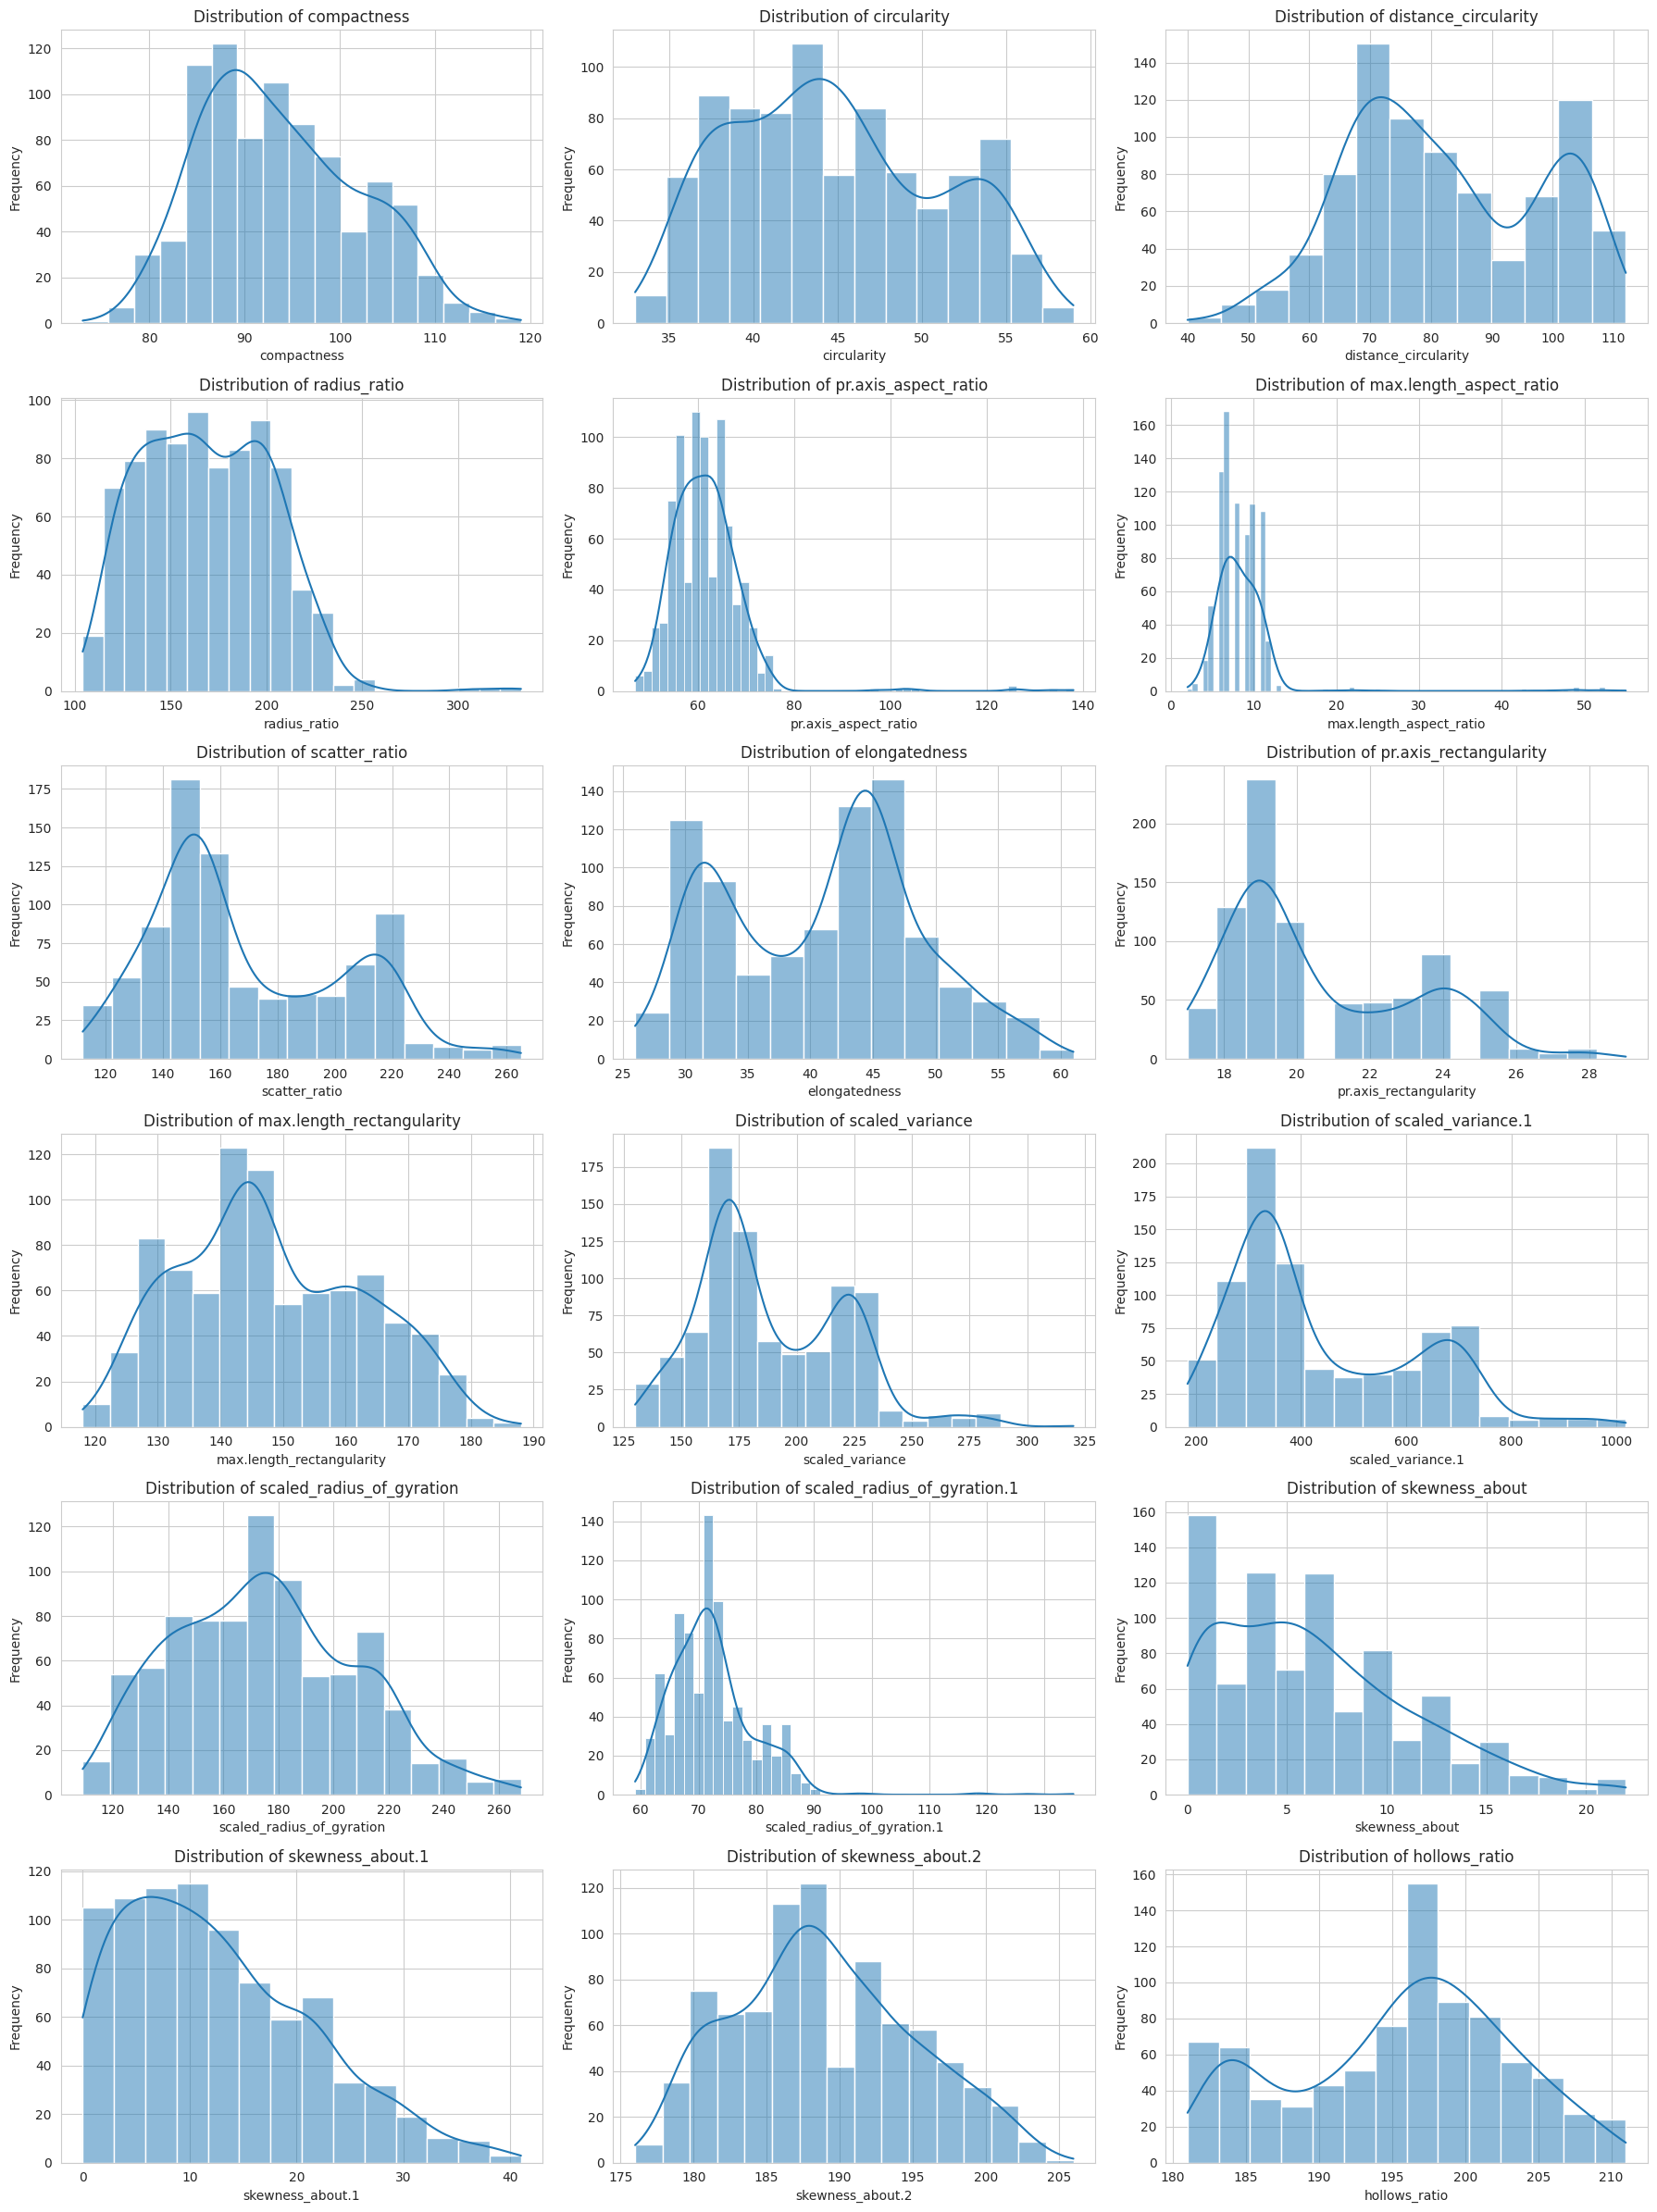

In [12]:
numerical_features = train.select_dtypes(include=["number"]).columns

sns.set_style("whitegrid")
sns.color_palette("coolwarm")

#Defining number of rows and columns
n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))

#Creating subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of single row

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Observation: Outliers exist in:

- scaled_radius of gyration.1

- scaled_variance.1

- scaled_variance

- max.length_aspect_ratio

- pr.axis_aspect_ratio

- radius_ratio

In [13]:
#Checking categorical distributions
train["class"].value_counts()

,count
class,
car,343
bus,174
van,159


Observation: Class = Car contains > double the amount of occurances as the other two classes however Balancing shouldn't be neccersary

##Bivariate analysis

In [14]:
#Running correlation matrix
corr_matrix = train.corr(numeric_only=True)
print(corr_matrix)

                             compactness  circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  elongatedness  pr.axis_rectangularity  max.length_rectangularity  scaled_variance  scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  skewness_about  skewness_about.1  skewness_about.2  hollows_ratio
compactness                     1.000000     0.685095              0.796747      0.681977              0.073335                 0.133472       0.814480      -0.789231                0.815914                   0.682616         0.758639           0.820785                   0.590623                    -0.265690        0.229502          0.181707          0.304665       0.382563
circularity                     0.685095     1.000000              0.797162      0.617062              0.142959                 0.235966       0.847315      -0.823453                0.838838                   0.959720         0.795373           0

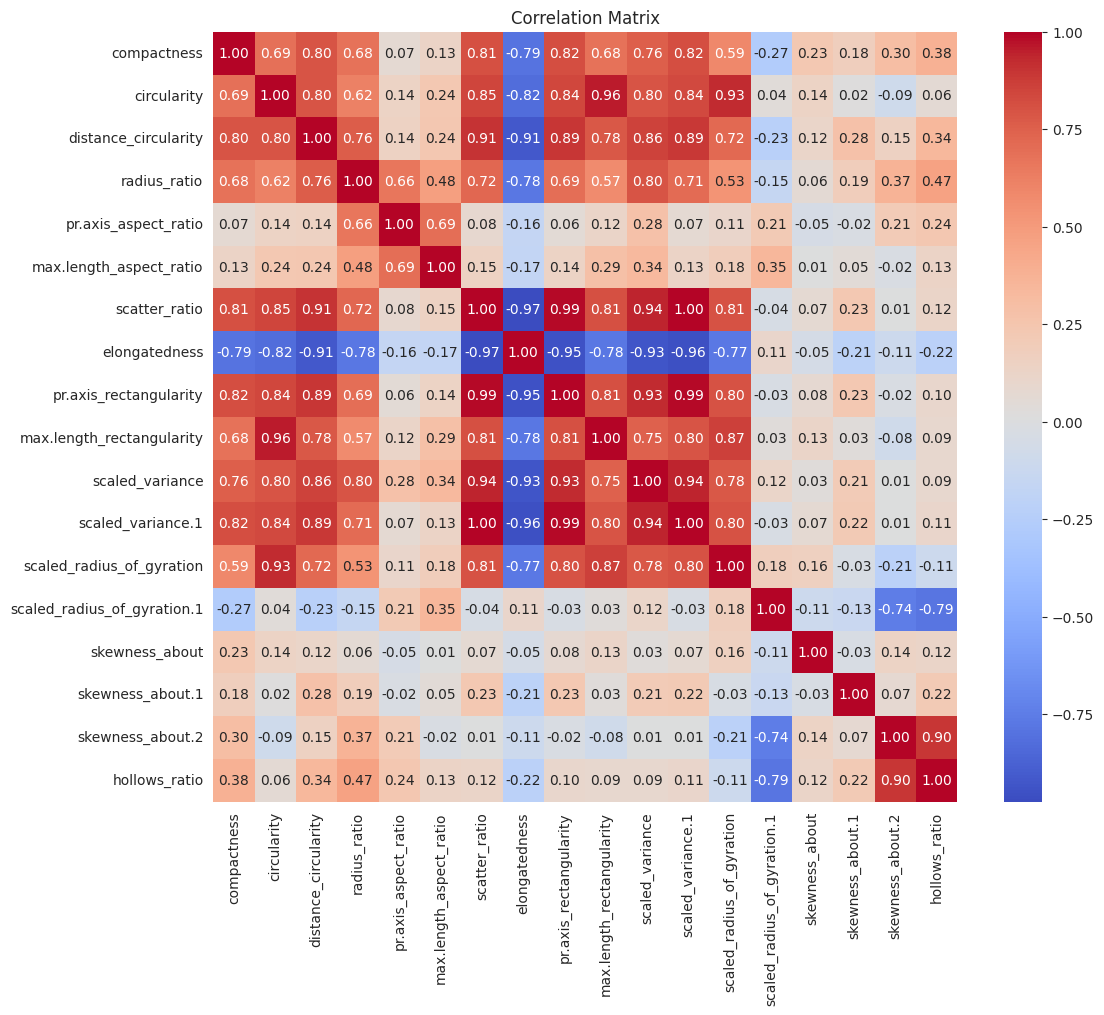

In [15]:
#Visualising correlations between features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Observation: Most features correlate strongly (+/- >=65) with at least one other feature

Exceptions being *skewness_about and skewness_about.1* which have very little correlation with other features.

The following combinations have significant correlation (we may be able to drop some of these):
- scatter_ratio x pr.axis_rectangularity (0.99)

- elongatedness x scatter_ratio (-0.97)

- pr.axis_rectangularity x scaled_variance.1 (0.99)

- scaled_variance.1 x scatter_ratio (1.0)

In [16]:
#Checking for strong correlations between target and features
num_features = train.drop(columns=['class']).columns
significant_features = []

for feature in num_features:
    stat, p_value = kruskal(
        df[df['class'] == 'bus'][feature],
        df[df['class'] == 'van'][feature],
        df[df['class'] == 'car'][feature]
    )
    if p_value < 0.05:
        significant_features.append(feature)
        print(f"{feature}: Stat = {stat:.2f}, p = {p_value:.5f} (Significant)")

print("\nSignificant Features:", significant_features)

compactness: Stat = 79.32, p = 0.00000 (Significant)
max.length_aspect_ratio: Stat = 197.54, p = 0.00000 (Significant)
max.length_rectangularity: Stat = 11.74, p = 0.00283 (Significant)
hollows_ratio: Stat = 86.97, p = 0.00000 (Significant)

Significant Features: ['compactness', 'max.length_aspect_ratio', 'max.length_rectangularity', 'hollows_ratio']


Observation: the above 'significant' features show high differentiation between vehicle classes and could be useful in determining the class of a vehicle.

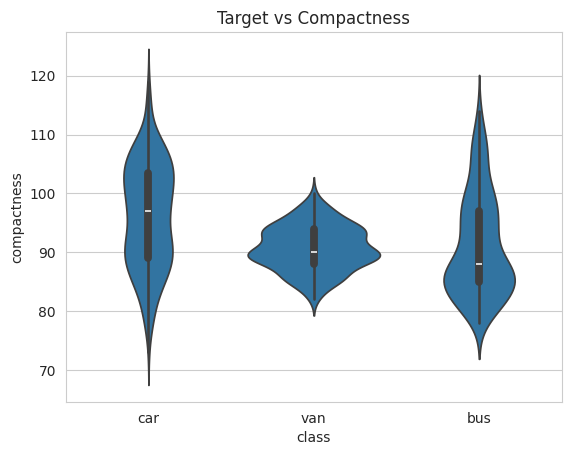

In [17]:
#Checking distributions between 'significant features' and target classes
sns.violinplot(train, x="class", y="compactness")
plt.title("Target vs Compactness")
plt.show()

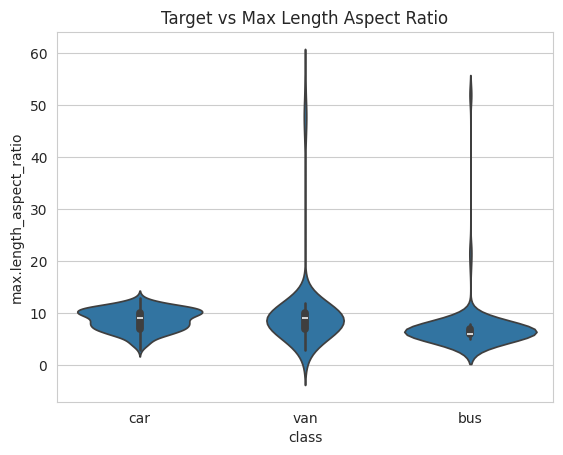

In [18]:
sns.violinplot(train, x="class", y="max.length_aspect_ratio")
plt.title("Target vs Max Length Aspect Ratio")
plt.show()

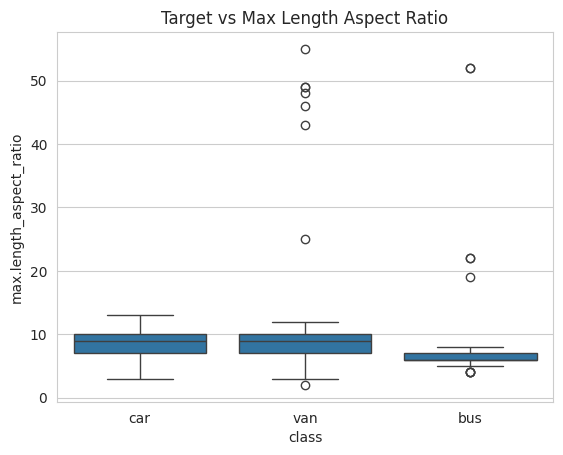

In [19]:
#Double checking outliers
sns.boxplot(train, x="class", y="max.length_aspect_ratio")
plt.title("Target vs Max Length Aspect Ratio")
plt.show()

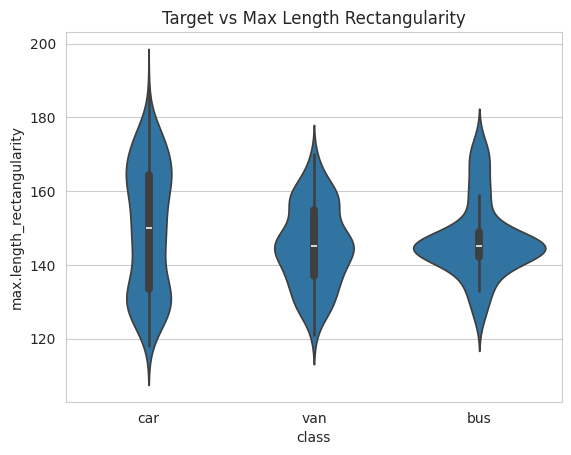

In [20]:
sns.violinplot(train, x="class", y="max.length_rectangularity")
plt.title("Target vs Max Length Rectangularity")
plt.show()

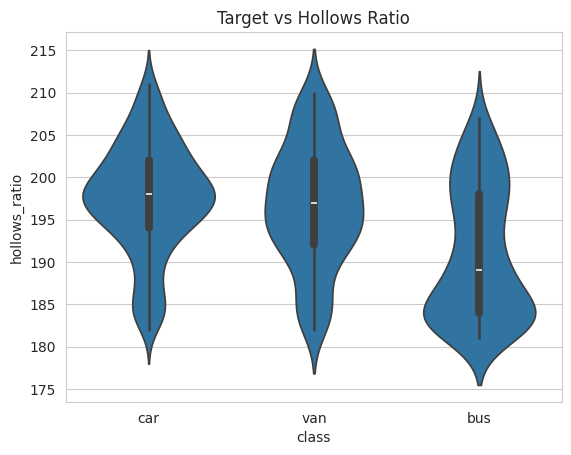

In [21]:
sns.violinplot(train, x="class", y="hollows_ratio")
plt.title("Target vs Hollows Ratio")
plt.show()

Observation:
Significant target x feature correlations: *'compactness', 'max.length_aspect_ratio', 'max.length_rectangularity', 'hollows_ratio'*

Outliers exist in *target vs max.length_aspect_ratio*, specifically for **Van and Bus**

##Encoding Target

In [22]:
#One-hot encoding the target in both train and test
train_encoded = pd.get_dummies(train, columns=["class"])
test_encoded = pd.get_dummies(test, columns=["class"])

#Ensuring both train and test have the same one-hot encoded columns
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0s

#Ensuring column order matches between train and test
test_encoded = test_encoded[train_encoded.columns]

#Droping original class column
if "class" in train_encoded.columns:
    train_encoded = train_encoded.drop(columns=["class"])
if "class" in test_encoded.columns:
    test_encoded = test_encoded.drop(columns=["class"])

#Checking new shape
print("Train shape:", train_encoded.shape)
print("Test shape:", test_encoded.shape)

Train shape: (676, 21)
Test shape: (170, 21)


##Feature Selection

In [23]:
#Dropping one side of highly correlated features
train_encoded = train_encoded.drop(columns=['scaled_variance.1', 'scatter_ratio'])
test_encoded = test_encoded.drop(columns=['scaled_variance.1', 'scatter_ratio'])

#Logistic regression

I will start with a simple model without any feature scaling or reduction.

Accuracy: 0.9294117647058824


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


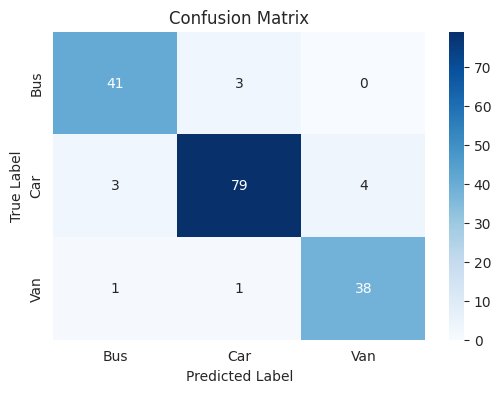

In [27]:
#Defining features and target
X_train = train_encoded.drop(columns=['class_bus', 'class_car', 'class_van'])
y_train = train_encoded[['class_bus', 'class_car', 'class_van']]

X_test = test_encoded.drop(columns=['class_bus', 'class_car', 'class_van'])
y_test = test_encoded[['class_bus', 'class_car', 'class_van']]

#Converting to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = np.argmax(y_train.values, axis=1)
y_test_orig = y_test
y_test = np.argmax(y_test.values, axis=1)

#Training logistic regression (without scaling)
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=8)
lr_model.fit(X_train, y_train)

y_pred_probs = lr_model.predict_proba(X_test)

#Converting one-hot encoded y_test back to label format
y_test_labels = y_test

#Convert predicted probabilities into class labels
y_pred = np.argmax(y_pred_probs, axis=1)

#Metrics
print("Accuracy:", accuracy_score(y_test_labels, y_pred))

cm = confusion_matrix(y_test_labels, y_pred)
class_labels = ['Bus', 'Car', 'Van']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Observation: High accuracy at 0.92 but the model was not able to converge properly without scaling.

##Feature scaling

In [28]:
#Scaling data to improve models ability to converge
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.9588235294117647


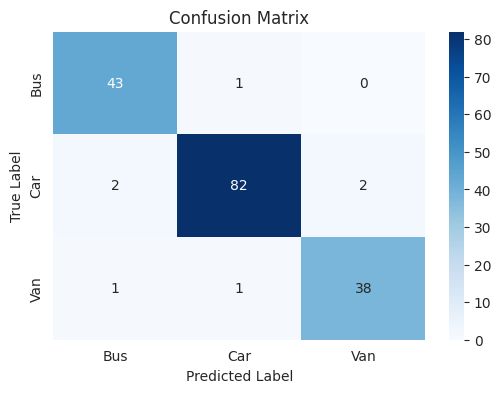

In [29]:
#Training model
lr2_model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=8)
lr2_model.fit(X_train, y_train)

y_pred_probs = lr2_model.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

#Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test_labels, y_pred)
class_labels = ['Bus', 'Car', 'Van']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Observation: Accuracy score very high (0.95). I will check for overfitting.

##Checking for overfitting

In [30]:
#Checking other metrics for inbalances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.95      0.96        86
           2       0.95      0.95      0.95        40

    accuracy                           0.96       170
   macro avg       0.95      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



Observation: No anomalies found

In [31]:
#Using cross validation to check for hidden issues
scores = cross_val_score(lr2_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.97058824 0.86666667 0.91111111 0.97037037 0.93333333]
Mean CV accuracy: 0.9304


Observation: Variance in the cross validation score suggests some sensitivity

In [32]:
#Checking variability with targets balanced
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)
scores = cross_val_score(lr2_model, X_train, y_train, cv=cv)
print(f"Stratified Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")

Stratified Cross-validation scores: [0.94117647 0.93333333 0.93333333 0.92592593 0.94814815]
Mean accuracy: 0.9364


Observation: After balancing the targets, cross validation much more consistent.

I will perform logistic regression again but this time applying a balance to the target.

##Model optimisation

Computed Class Weights: {np.int64(0): np.float64(1.2950191570881227), np.int64(1): np.float64(0.6569484936831875), np.int64(2): np.float64(1.4171907756813418)}
Accuracy: 0.9588235294117647


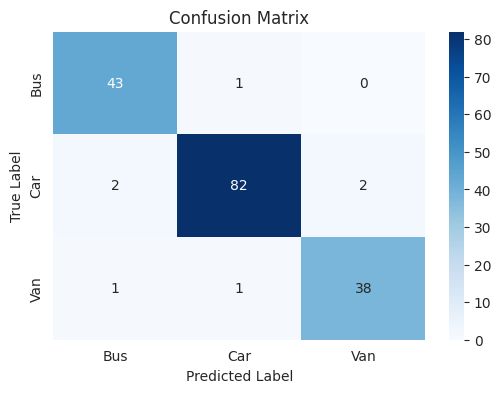

In [34]:
#Dropping targets
X_train = train_encoded.drop(columns=['class_bus', 'class_car', 'class_van'])
X_test = test_encoded.drop(columns=['class_bus', 'class_car', 'class_van'])

#Scaling data to improve models ability to converge
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Balancing class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
print("Computed Class Weights:", dict(zip(np.unique(y_train), class_weights)))

#Training model
lr3_model = LogisticRegression(max_iter=500, class_weight='balanced', random_state=8)
lr3_model.fit(X_train, y_train)

y_pred_probs = lr3_model.predict_proba(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

#Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_labels = ['Bus', 'Car', 'Van']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [35]:
#Using cross validation to check for improved target balance
scores = cross_val_score(lr3_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean():.4f}")

Cross-validation scores: [0.97058824 0.86666667 0.91111111 0.97037037 0.93333333]
Mean CV accuracy: 0.9304


Observation: Cross valdation after target balance reveals no difference in results.

In [36]:
#Checking training vs. test accuracy
train_accuracy = lr3_model.score(X_train, y_train)
test_accuracy = lr3_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9453
Test Accuracy: 0.9588


Observation: Training accuracy is lower than test. No overfitting detected.

#Decision tree

Next i will run a simple Decision Tree to see if i can improve results and learn anything new.

In [39]:
import numpy as np
import pandas as pd

#Log‑scaling scaled_variance.1 and max.length_aspect_ratio due to outliers
if isinstance(X_train, pd.DataFrame) and 'scaled_variance.1' in X_train.columns:
    X_train['scaled_variance.1_log'] = np.log(X_train['scaled_variance.1'] + 1)
if isinstance(X_train, pd.DataFrame) and 'max.length_aspect_ratio' in X_train.columns:
    X_train['max.length_aspect_ratio_log'] = np.log(X_train['max.length_aspect_ratio'] + 1)

if isinstance(X_test, pd.DataFrame) and 'scaled_variance.1' in X_test.columns:
    X_test['scaled_variance.1_log'] = np.log(X_test['scaled_variance.1'] + 1)
if isinstance(X_test, pd.DataFrame) and 'max.length_aspect_ratio' in X_test.columns:
    X_test['max.length_aspect_ratio_log'] = np.log(X_test['max.length_aspect_ratio'] + 1)

#Dropping orginals
if isinstance(X_train, pd.DataFrame):
    X_train.drop(columns=['scaled_variance.1', 'max.length_aspect_ratio'], inplace=True, errors='ignore')
if isinstance(X_test, pd.DataFrame):
    X_test.drop(columns=['scaled_variance.1', 'max.length_aspect_ratio'], inplace=True, errors='ignore')

Accuracy: 0.888235294117647


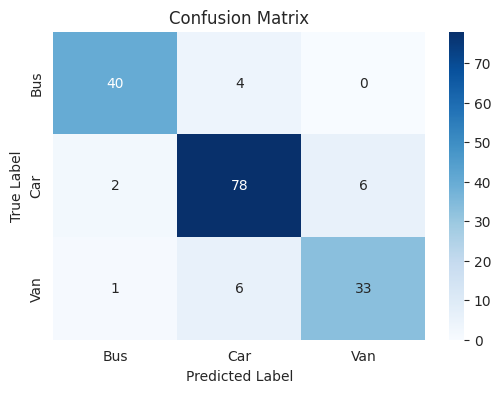

In [40]:
#Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=8)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

#Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test_labels, y_pred)
class_labels = ['Bus', 'Car', 'Van']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Observation: The model has performed well (0.88) so I will see if I can improve on it with some tuning.

In [41]:
#Checking other metrics for inbalances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.89      0.91      0.90        86
           2       0.85      0.82      0.84        40

    accuracy                           0.89       170
   macro avg       0.89      0.88      0.88       170
weighted avg       0.89      0.89      0.89       170



##Grid search

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Model Accuracy: 0.9


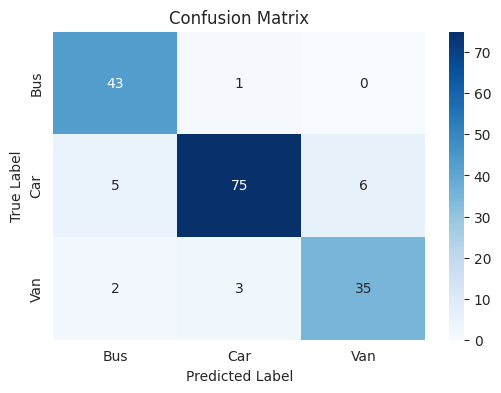

In [42]:
#Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=8), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

#Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#Metrics
print("Best Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test_labels, y_pred)
class_labels = ['Bus', 'Car', 'Van']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Observation: The accuracy score increase by 2 points to 90. I will try to find some insights for further optimisation.

In [43]:
#Checking other metrics for inbalances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91        44
           1       0.95      0.87      0.91        86
           2       0.85      0.88      0.86        40

    accuracy                           0.90       170
   macro avg       0.89      0.91      0.90       170
weighted avg       0.90      0.90      0.90       170



First Decision: If elongatedness <= 0.06


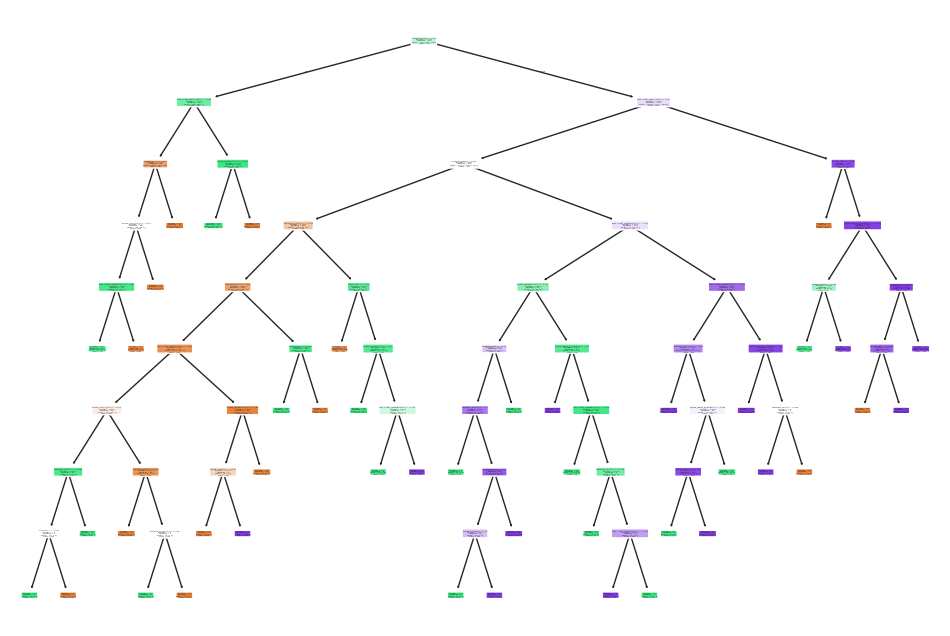

In [44]:
#Accessing the first decision node
first_decision_feature = best_dt_model.tree_.feature[0]
first_decision_threshold = best_dt_model.tree_.threshold[0]

feature_names = train_encoded.drop(columns=['class_bus', 'class_car', 'class_van']).columns
first_decision_feature_name = feature_names[first_decision_feature]

#Printing the first node
print(f"First Decision: If {first_decision_feature_name} <= {first_decision_threshold:.2f}")

#Plotting the decision tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_model,
             feature_names=train_encoded.drop(columns=['class_bus', 'class_car', 'class_van']).columns,
             class_names=['bus', 'car', 'van'],
             filled=True,
             rounded=True)
plt.show()

#Random Forest

Next I will run a Random Forest model to see if I can improve on previous model metrics.

Random Forest Accuracy: 0.9352941176470588


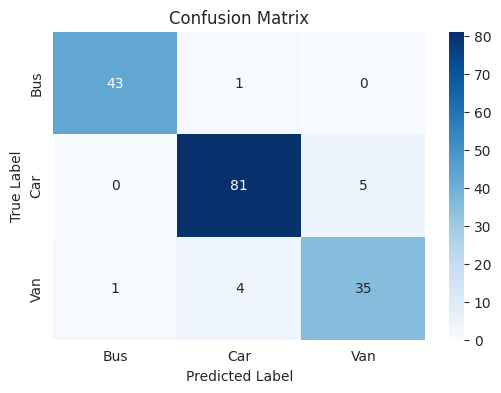

In [45]:
#Creating a Random Forest classifier
rf_model = RandomForestClassifier(random_state=8)

#Training the model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

#Metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test_labels, y_pred)
class_labels = ['Bus', 'Car', 'Van']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Observation: Random Forest delivered a high accuracy score (0.93) but still lower than Logistic Regression (0.95). I will perform hyperparameter tuning for further optimisation.

In [46]:
#Checking other metrics for inbalances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.94      0.94      0.94        86
           2       0.88      0.88      0.88        40

    accuracy                           0.94       170
   macro avg       0.93      0.93      0.93       170
weighted avg       0.94      0.94      0.94       170



##Grid search

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Accuracy: 0.9352941176470588


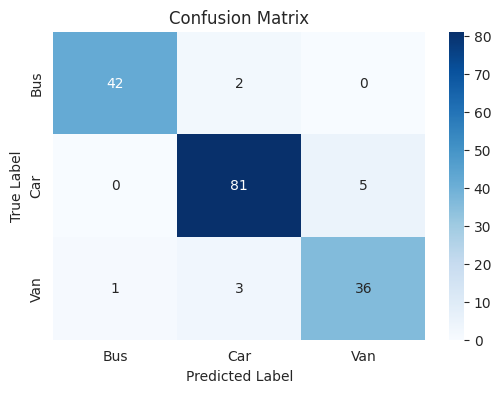

In [47]:
#Defining hyperparameter grid
param_grid = {
    'n_estimators': [50, 75, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

#Initialize base model
rf_model2 = RandomForestClassifier(random_state=8)

#Perform GridSearchCV
grid_search = GridSearchCV(rf_model2, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

#Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

#Train best model
best_rf_model = RandomForestClassifier(**best_params, random_state=8)
best_rf_model.fit(X_train, y_train)

#Predict on test data
y_pred = best_rf_model.predict(X_test)

#Metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test_labels, y_pred)
class_labels = ['Bus', 'Car', 'Van']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [48]:
#Checking other metrics for inbalances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.94      0.94      0.94        86
           2       0.88      0.90      0.89        40

    accuracy                           0.94       170
   macro avg       0.93      0.93      0.93       170
weighted avg       0.94      0.94      0.94       170



Observation: No change in model performance after gridsearch.

Now i will see what additional insights i can garner from the models performance.

                        Feature  Importance
5       max.length_aspect_ratio    0.139593
6                 elongatedness    0.107178
9               scaled_variance    0.105809
2          distance_circularity    0.077108
8     max.length_rectangularity    0.075318
4          pr.axis_aspect_ratio    0.063896
7        pr.axis_rectangularity    0.061690
11  scaled_radius_of_gyration.1    0.057821
15                hollows_ratio    0.052899
0                   compactness    0.046461


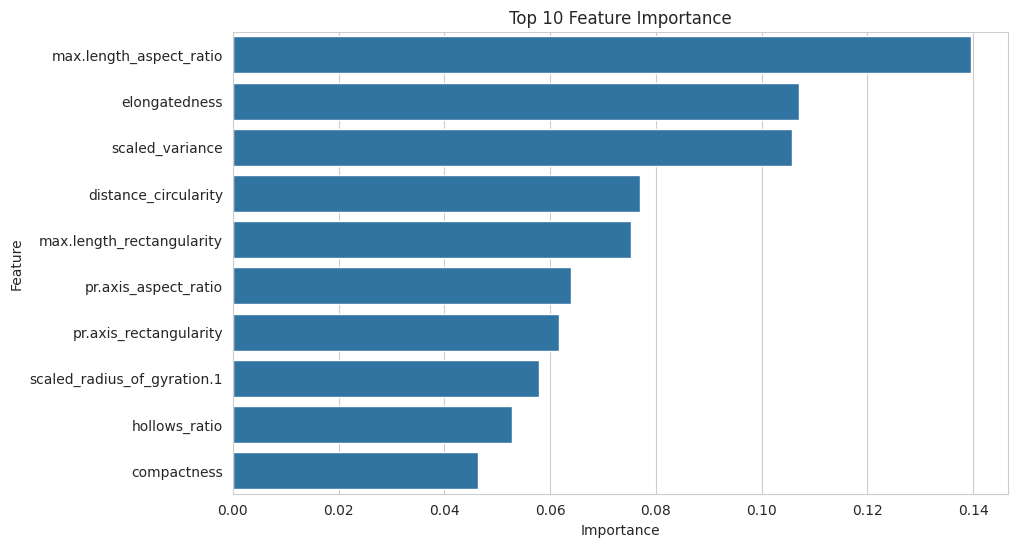

In [50]:
#Getting feature importances from Random Forest model
importances = rf_model.feature_importances_

feature_names = train_encoded.drop(columns=['class_bus', 'class_car', 'class_van']).columns

feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

#Printing the top features
N = 10
print(feature_importances_df.head(N))

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(N))
plt.title('Top {} Feature Importance'.format(N))
plt.show()

##Feature engineering

I will create a new feature with the insight from the decision tree.

I will also select features based on the insight from the Kruskal-Wallis test and top features from the Random Forest results.

Random Forest Accuracy: 0.9235294117647059


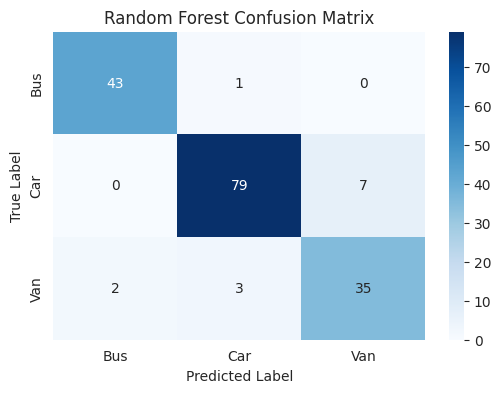

In [51]:
#New feature taken from first node of Decision Tree
train_encoded['elongated_binary'] = (train_encoded['elongatedness'] <= -0.06).astype(int)
test_encoded['elongated_binary'] = (test_encoded['elongatedness'] <= -0.06).astype(int)

#Droping original column
train_encoded.drop(columns=['elongatedness'], inplace=True, errors='ignore')
test_encoded.drop(columns=['elongatedness'], inplace=True, errors='ignore')

#Feature selection based on EDA and Random Forest insights
features = ['max.length_aspect_ratio', 'scaled_variance', 'distance_circularity', 'max.length_rectangularity', 'elongated_binary', 'pr.axis_aspect_ratio', 'pr.axis_rectangularity', 'pr.axis_aspect_ratio', 'scaled_radius_of_gyration.1', 'hollows_ratio', 'elongated_binary']

X_train_final = train_encoded[features]
y_train_final = np.argmax(train_encoded[['class_bus', 'class_car', 'class_van']].values, axis=1)

X_test_final = test_encoded[features]
y_test_final = np.argmax(test_encoded[['class_bus', 'class_car', 'class_van']].values, axis=1)

#Training model
model_final_rf = RandomForestClassifier(n_estimators=100, random_state=8, class_weight='balanced')
model_final_rf.fit(X_train_final, y_train_final)

y_pred_final_rf = model_final_rf.predict(X_test_final)

#Metrics
print("Random Forest Accuracy:", accuracy_score(y_test_final, y_pred_final_rf))

cm_rf = confusion_matrix(y_test_final, y_pred_final_rf)
class_labels = ['Bus', 'Car', 'Van']

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

Observation: No improvement observed after feature engineering and selection.

In [52]:
#Checking other metrics for inbalances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.94      0.94      0.94        86
           2       0.88      0.90      0.89        40

    accuracy                           0.94       170
   macro avg       0.93      0.93      0.93       170
weighted avg       0.94      0.94      0.94       170



#Logistic regression 2.0

I will try logisitc regression one last time using the refined feature selection.

Accuracy: 0.888235294117647


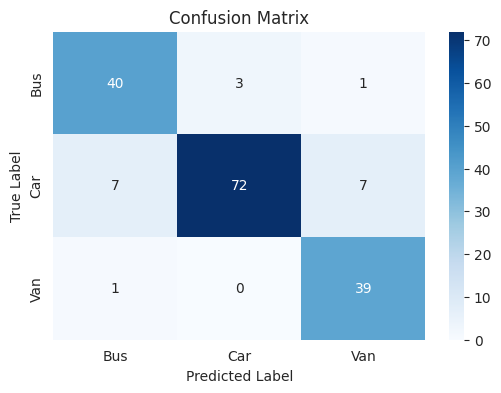

In [53]:
X_train_final = train_encoded[features]
y_train_final = train_encoded[['class_bus', 'class_car', 'class_van']]

X_test_final = test_encoded[features]
y_test_final = test_encoded[['class_bus', 'class_car', 'class_van']]

#Scaling
scaler_final = StandardScaler()
X_train_final = scaler_final.fit_transform(X_train_final)
X_test_final = scaler_final.transform(X_test_final)

#Training the final model
model_final = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=8)
model_final.fit(X_train_final, np.argmax(y_train_final.values, axis=1))

y_pred_final = model_final.predict(X_test_final)

#Metrics
y_test_final_multiclass = np.argmax(y_test_final.values, axis=1)
print("Accuracy:", accuracy_score(y_test_final_multiclass, y_pred_final))

cm = confusion_matrix(y_test_final_multiclass, y_pred_final)
class_labels = ['Bus', 'Car', 'Van']

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Observation: Feature refinement unsuccesful. Original regression model remains optimal.

In [54]:
#Checking other metrics for inbalances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.94      0.94      0.94        86
           2       0.88      0.90      0.89        40

    accuracy                           0.94       170
   macro avg       0.93      0.93      0.93       170
weighted avg       0.94      0.94      0.94       170



#Conclusion

**Model Performance Comparison**

*Logistic Regression* achieved the highest accuracy (0.95) after scaling, outperforming *Decision Tree* (0.90) and *Random Forest* (0.93).

Cross-validation results for Logistic Regression (0.93 mean accuracy after stratification) were stable, confirming model generalizability.

No signs of overfitting were detected, with training accuracy (0.94) aligning closely to test accuracy (0.96).

<ipython-input-55-23ae93542a4e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_accuracies, palette='coolwarm')


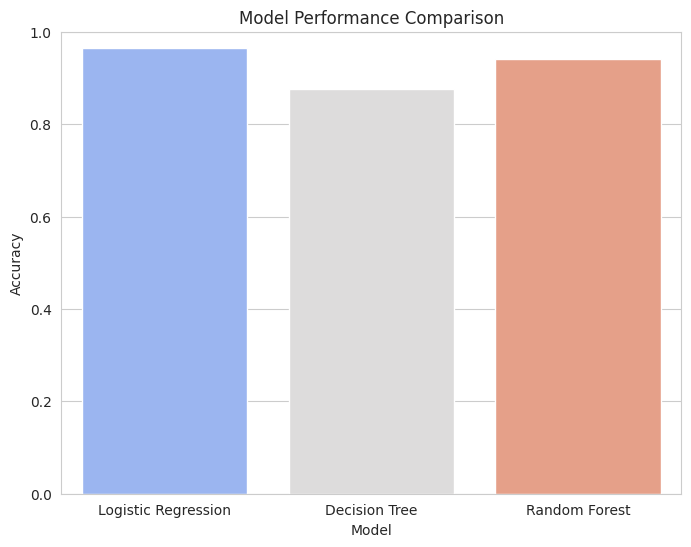

In [55]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
model_accuracies = [0.964, 0.876, 0.941]

sns.set_style("whitegrid")
sns.color_palette("coolwarm")

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=model_accuracies, palette='coolwarm')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()